# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []


In [6]:
# Loop through the cities to append the information into the above lists
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        city_count = len(City)
        print(f"City {city_count} added, {city}")
        print("--------------------")
    except KeyError:
        print("Missing field/result... skipping.")
        print("--------------------")
   

City 1 added, punta arenas
--------------------
City 2 added, deputatskiy
--------------------
City 3 added, rikitea
--------------------
City 4 added, kavaratti
--------------------
City 5 added, jalu
--------------------
City 6 added, porto walter
--------------------
City 7 added, tiksi
--------------------
City 8 added, qaanaaq
--------------------
City 9 added, tasiilaq
--------------------
City 10 added, leh
--------------------
City 11 added, cabedelo
--------------------
City 12 added, hobart
--------------------
City 13 added, busselton
--------------------
City 14 added, auch
--------------------
City 15 added, mataura
--------------------
City 16 added, bluff
--------------------
City 17 added, lebu
--------------------
City 18 added, huangnihe
--------------------
Missing field/result... skipping.
--------------------
City 19 added, padang
--------------------
City 20 added, mahebourg
--------------------
Missing field/result... skipping.
--------------------
City 21 added,

City 165 added, marzuq
--------------------
City 166 added, lorengau
--------------------
City 167 added, provideniya
--------------------
City 168 added, nikolskoye
--------------------
City 169 added, mar del plata
--------------------
City 170 added, inyonga
--------------------
Missing field/result... skipping.
--------------------
City 171 added, zhezkazgan
--------------------
Missing field/result... skipping.
--------------------
City 172 added, ouesso
--------------------
City 173 added, tondano
--------------------
City 174 added, yellowknife
--------------------
Missing field/result... skipping.
--------------------
City 175 added, whyalla
--------------------
City 176 added, zhigansk
--------------------
City 177 added, severo-kurilsk
--------------------
City 178 added, kodinsk
--------------------
City 179 added, ankazoabo
--------------------
City 180 added, clyde river
--------------------
City 181 added, kahului
--------------------
City 182 added, leningradskiy
-------

City 323 added, sao filipe
--------------------
City 324 added, santana
--------------------
City 325 added, lethem
--------------------
City 326 added, anadyr
--------------------
City 327 added, luderitz
--------------------
City 328 added, terrace
--------------------
City 329 added, praia da vitoria
--------------------
City 330 added, koshki
--------------------
City 331 added, rena
--------------------
City 332 added, casablanca
--------------------
City 333 added, shubarkuduk
--------------------
City 334 added, palana
--------------------
City 335 added, tocopilla
--------------------
City 336 added, awbari
--------------------
City 337 added, seoul
--------------------
City 338 added, turtas
--------------------
City 339 added, geraldton
--------------------
City 340 added, guane
--------------------
City 341 added, constitucion
--------------------
City 342 added, filadelfia
--------------------
Missing field/result... skipping.
--------------------
City 343 added, vao
------

City 482 added, craig
--------------------
City 483 added, sobolevo
--------------------
City 484 added, umm lajj
--------------------
City 485 added, bol
--------------------
Missing field/result... skipping.
--------------------
City 486 added, port augusta
--------------------
Missing field/result... skipping.
--------------------
City 487 added, progreso
--------------------
City 488 added, kapit
--------------------
City 489 added, turangi
--------------------
City 490 added, matay
--------------------
Missing field/result... skipping.
--------------------
City 491 added, suchiapa
--------------------
City 492 added, honghu
--------------------
City 493 added, mitu
--------------------
City 494 added, pacific grove
--------------------
City 495 added, ustyuzhna
--------------------
City 496 added, floro
--------------------
City 497 added, jati
--------------------
City 498 added, zalantun
--------------------
City 499 added, huilong
--------------------
City 500 added, sitio novo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert the raw data into a DataFrame
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp, 
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,66,CL,1587155705,47,-53.15,-70.92,57.20,11.41
1,Deputatsky,56,RU,1587155729,82,69.30,139.90,-12.77,2.13
2,Rikitea,1,PF,1587155729,65,-23.12,-134.97,77.18,2.51
3,Kavaratti,0,IN,1587155729,68,10.57,72.64,84.18,2.77
4,Jalu,0,LY,1587155729,26,29.03,21.55,69.21,5.99


In [8]:
# Check that there are over 500 rows
weather_data.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [9]:
# Save the DataFrame
weather_data.to_csv(r"../output_data/weather.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Create variables to clean up loop
plot_lat = weather_data["Lat"]
plot_temp = weather_data["Max Temp"]
plot_humidity = weather_data["Humidity"]
plot_cloud = weather_data["Cloudiness"]
plot_wind = weather_data["Wind Speed"]
date = "04/17/2020"

In [11]:
# Make lists for the for loop to iterate through
y_plots = [plot_temp, plot_humidity, plot_cloud, plot_wind]
y_labels = ["Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]

<IPython.core.display.Javascript object>


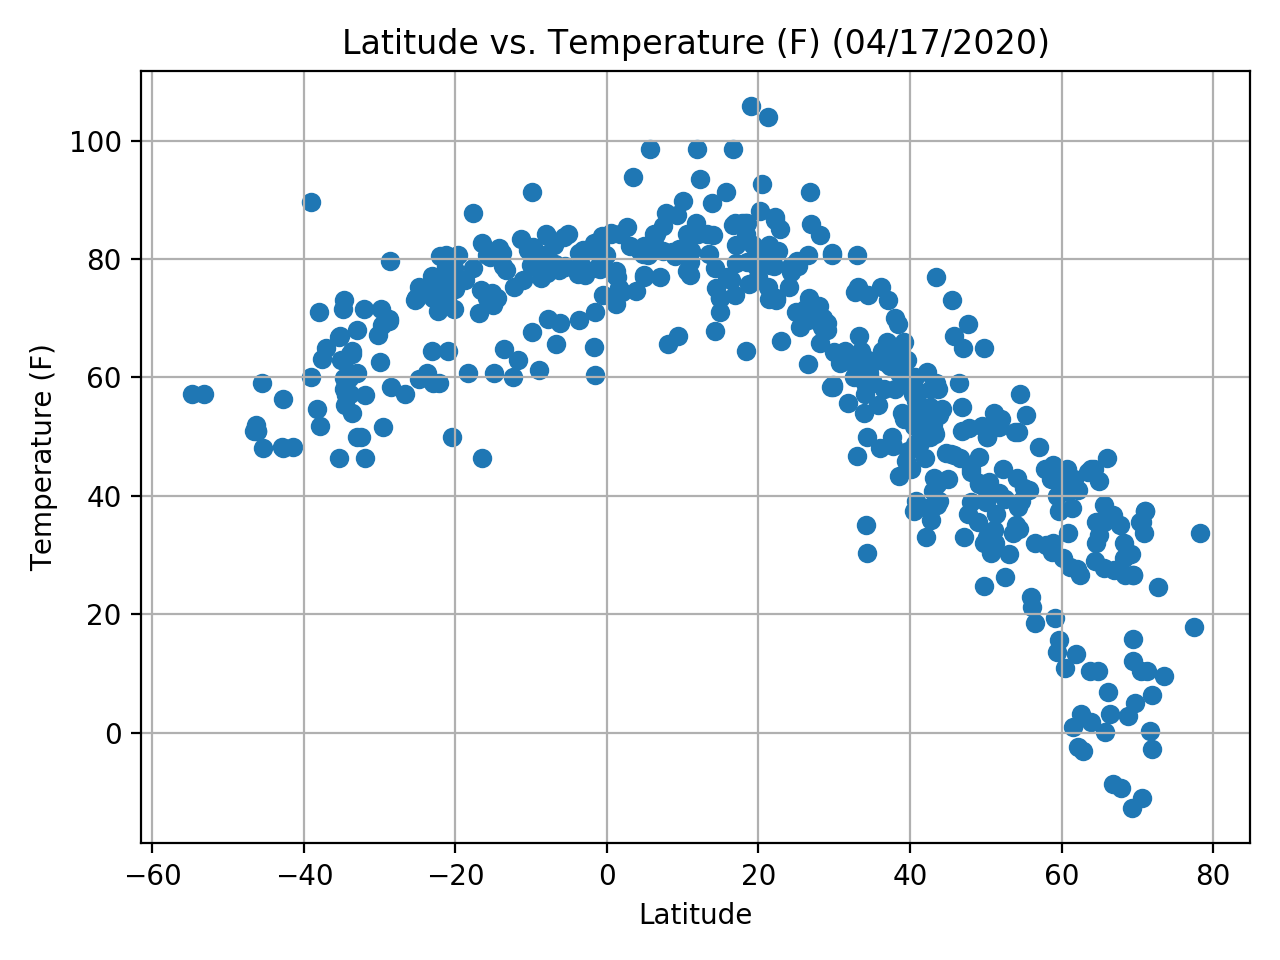

This is a scatter plot that is analyzing the latitude compared to the maximum temperature, in Fahrenheit, for all cities in the 
DataFrame. From this data, we can see that, generally,  as the cities  moved closer to the equator, the temperature rose. This is data for April 17, 2020.


<IPython.core.display.Javascript object>


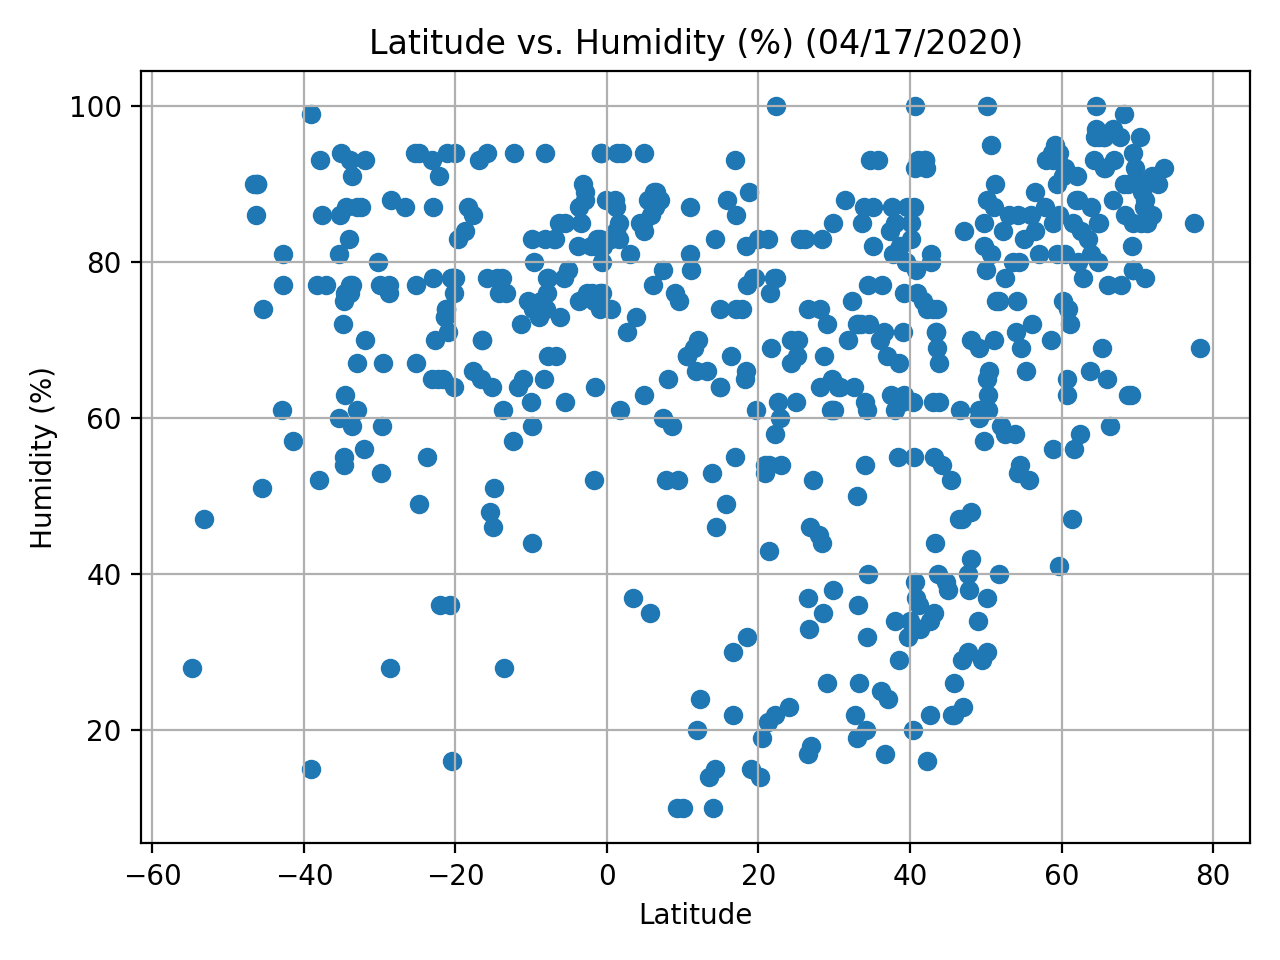

This is a scatter plot that is analyzing the latitude compared to the humidity percentage, for all cities in the DataFrame. 
From this data, we can see that there is correlation between higher latitude and higher percentages of humidity. This is data 
for April 17, 2020.


<IPython.core.display.Javascript object>


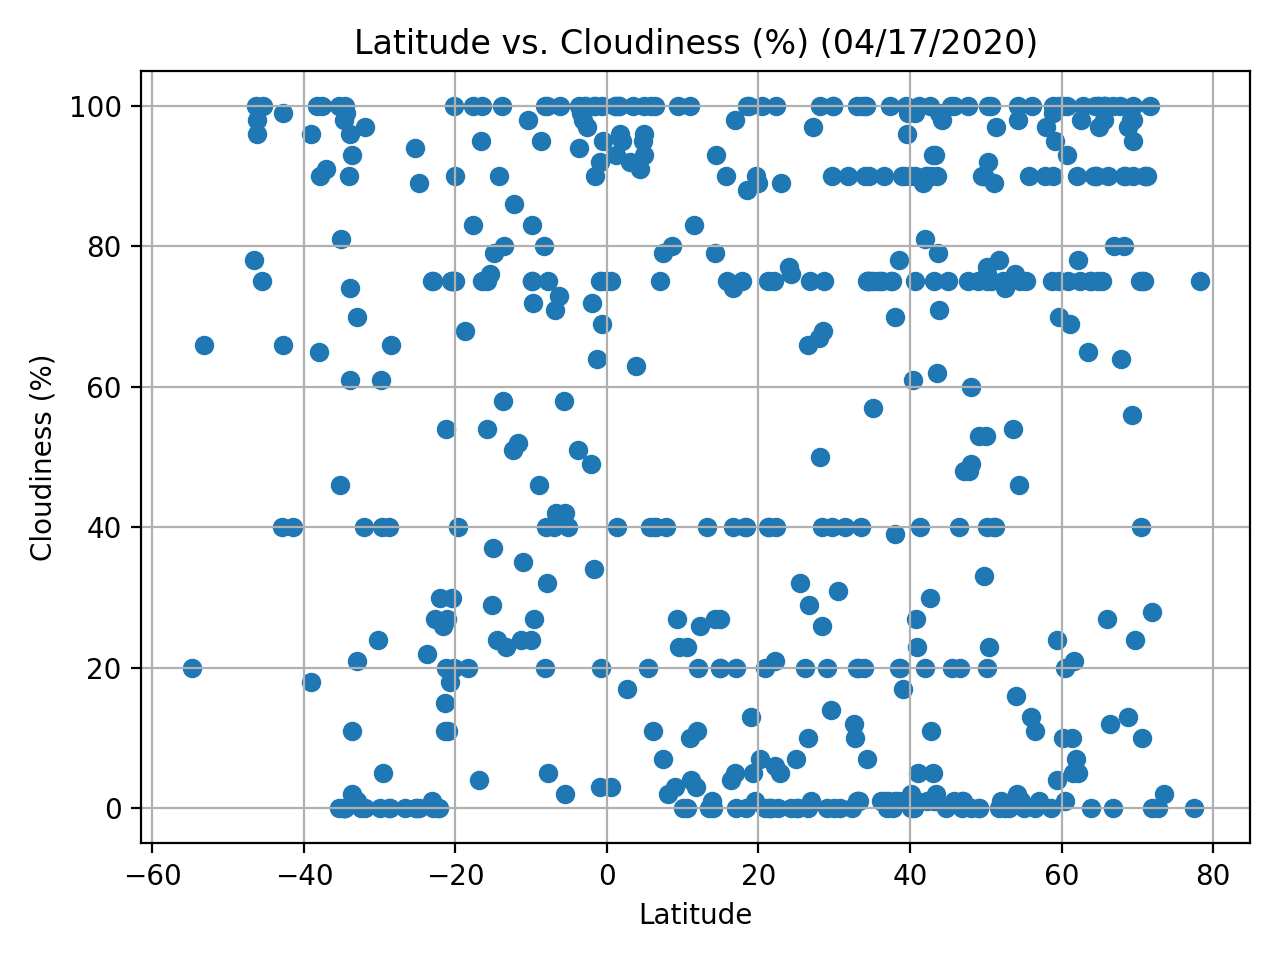

This is a scatter plot that is analyzing the latitude compared to the cloud coverage percentage, for all cities in the 
DataFrame. From this data, we can see that there is no clear correlation between latitude and cloud coverage percentage. 
This is data for April 17, 2020.


<IPython.core.display.Javascript object>


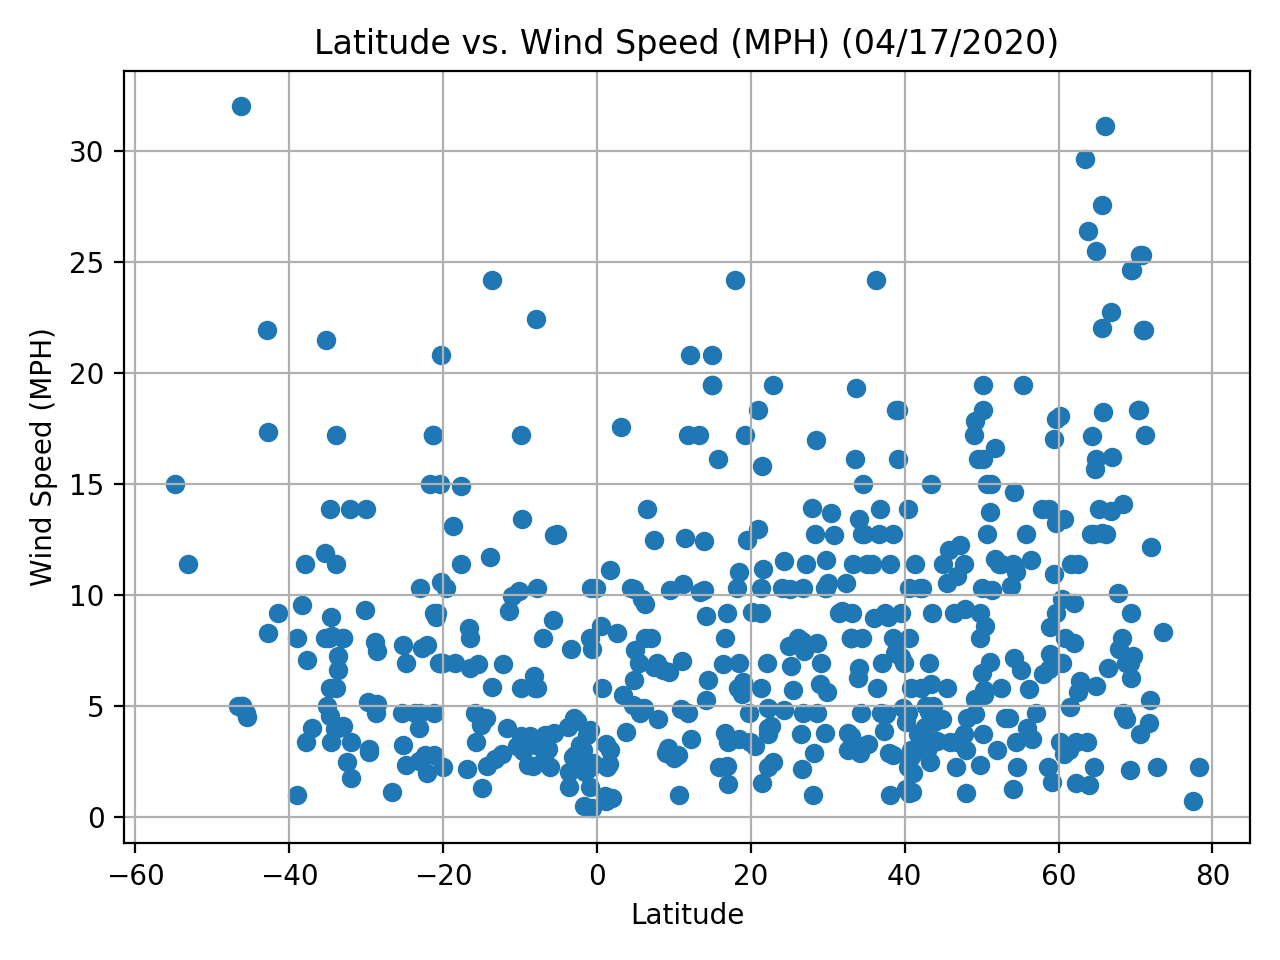

This is a scatter plot that is analyzing the latitude compared to the wind speed, in miles per hour, for all cities in the 
DataFrame. From this data, we can see that there is no clear correlation between latitude and wind speed. This is data for 
April 17, 2020.


In [12]:
# Create a loop to make scatter plots
for x in range(4):
    plt.figure()
    plt.scatter(plot_lat, y_plots[x])

    # Set title, x labels, and y labels for the chart
    plt.title(f"Latitude vs. {y_labels[x]} ({date})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_labels[x]}")
    plt.grid()

    # Display Chart with Tight Layout
    plt.show()
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"../output_data/Fig{x + 1}.png")
    
    # create a print statement for each graph
    if y_labels[x] == "Temperature (F)":
        print(f"This is a scatter plot that is analyzing the latitude compared to the maximum temperature, in Fahrenheit, for all cities in the \nDataFrame. From this data, we can see that, generally,  as the cities  moved closer to the equator, the temperature rose. This is data for April 17, 2020.")
    elif y_labels[x] == "Humidity (%)":
        print(f"This is a scatter plot that is analyzing the latitude compared to the humidity percentage, for all cities in the DataFrame. \nFrom this data, we can see that there is correlation between higher latitude and higher percentages of humidity. This is data \nfor April 17, 2020.")
    elif y_labels[x] == "Cloudiness (%)":
        print(f"This is a scatter plot that is analyzing the latitude compared to the cloud coverage percentage, for all cities in the \nDataFrame. From this data, we can see that there is no clear correlation between latitude and cloud coverage percentage. \nThis is data for April 17, 2020.")
    elif y_labels[x] == "Wind Speed (MPH)":
        print(f"This is a scatter plot that is analyzing the latitude compared to the wind speed, in miles per hour, for all cities in the \nDataFrame. From this data, we can see that there is no clear correlation between latitude and wind speed. This is data for \nApril 17, 2020.")

## Linear Regression

In [13]:
# Split the DataFrame by Hemisphere
nh_lat = weather_data[weather_data["Lat"] > 0]
sh_lat = weather_data[weather_data["Lat"] < 0]

# Create variables to clean up loop
plot_nh_lat = nh_lat["Lat"]
plot_nh_temp = nh_lat["Max Temp"]
plot_nh_humidity = nh_lat["Humidity"]
plot_nh_cloud = nh_lat["Cloudiness"]
plot_nh_wind = nh_lat["Wind Speed"]

plot_sh_lat = sh_lat["Lat"]
plot_sh_temp = sh_lat["Max Temp"]
plot_sh_humidity = sh_lat["Humidity"]
plot_sh_cloud = sh_lat["Cloudiness"]
plot_sh_wind = sh_lat["Wind Speed"]

In [14]:
# Make lists for the for loop to iterate through
x_reg_plots = [plot_nh_lat, plot_sh_lat, plot_nh_lat, plot_sh_lat, plot_nh_lat, plot_sh_lat, plot_nh_lat, plot_sh_lat]
y_reg_plots = [plot_nh_temp, plot_sh_temp, plot_nh_humidity, plot_sh_humidity, plot_nh_cloud, plot_sh_cloud, plot_nh_wind, plot_sh_wind]
x_reg_labels = ["Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude"]
y_reg_labels = ["Temperature (F)", "Temperature (F)", "Humidity (%)", "Humidity (%)", "Cloudiness (%)", "Cloudiness (%)", "Wind Speed (MPH)", "Wind Speed (MPH)"]

<IPython.core.display.Javascript object>


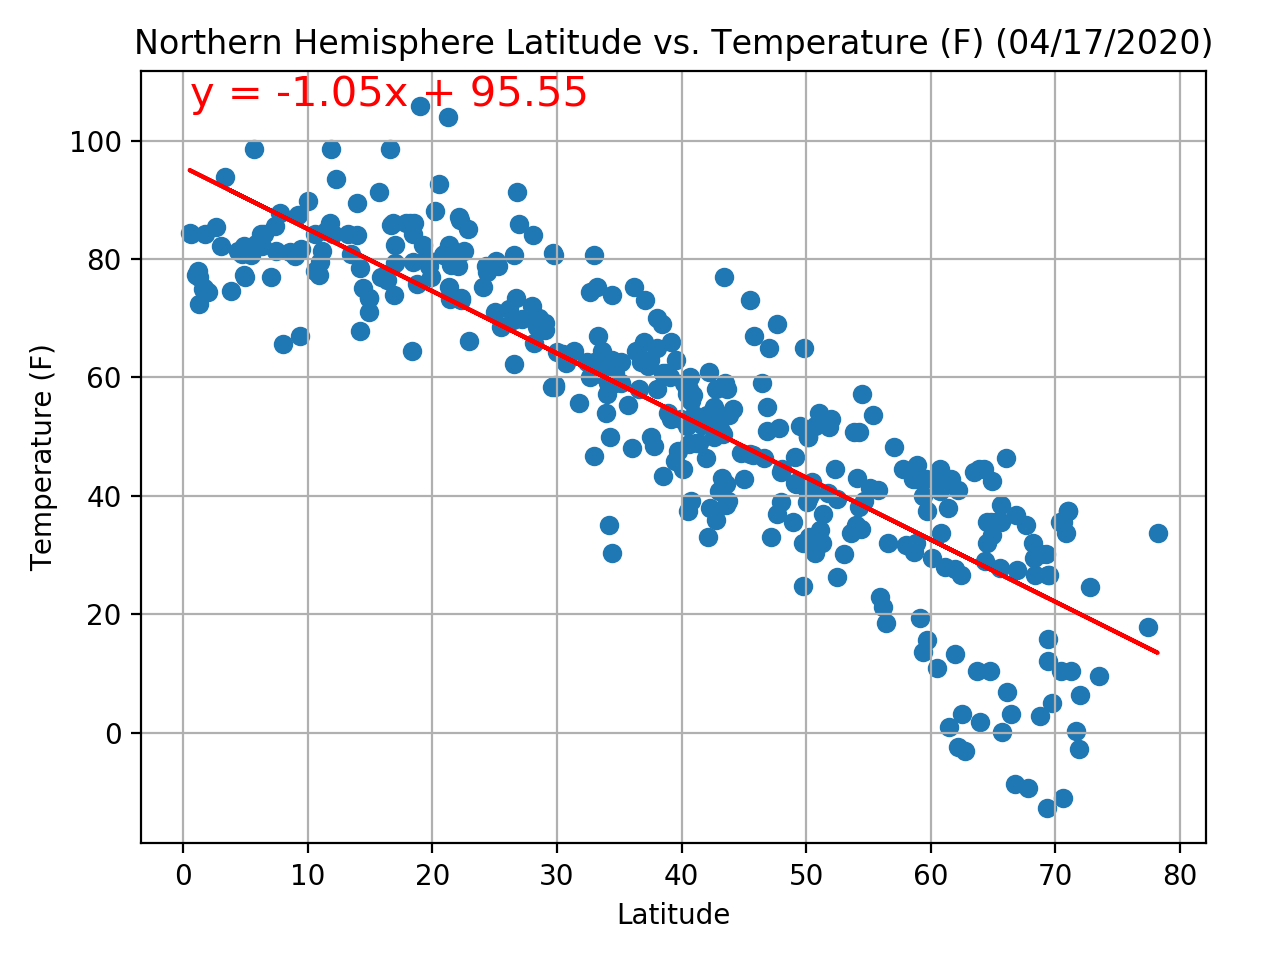

The r-squared is: 0.7664666465897745


<IPython.core.display.Javascript object>


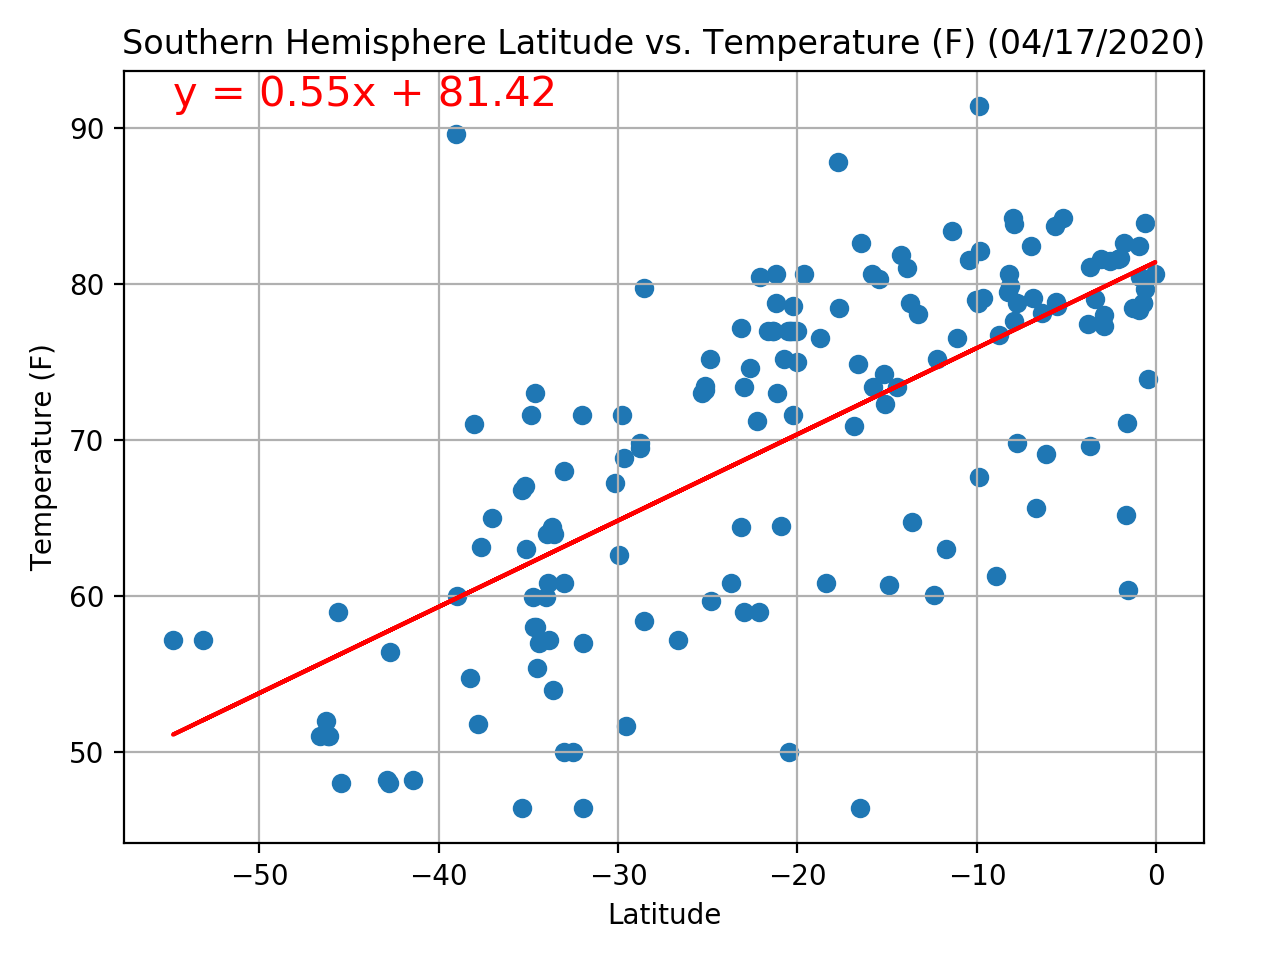

The r-squared is: 0.46916710433530295
These graphs are a set of scatter plots that are analyzing the latitude compared to the maximum temperature, in Fahrenheit, for all cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as 
the farther north, away from the equator, you get, the colder the temperature tends to be. The r-squared value is strong, so 
this is reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that 
as the farther north, toward from the equator, you get, the warmer the temperature tends to be. The r-squared value is strong, so this is reliable information. This is data for April 17, 2020.


<IPython.core.display.Javascript object>


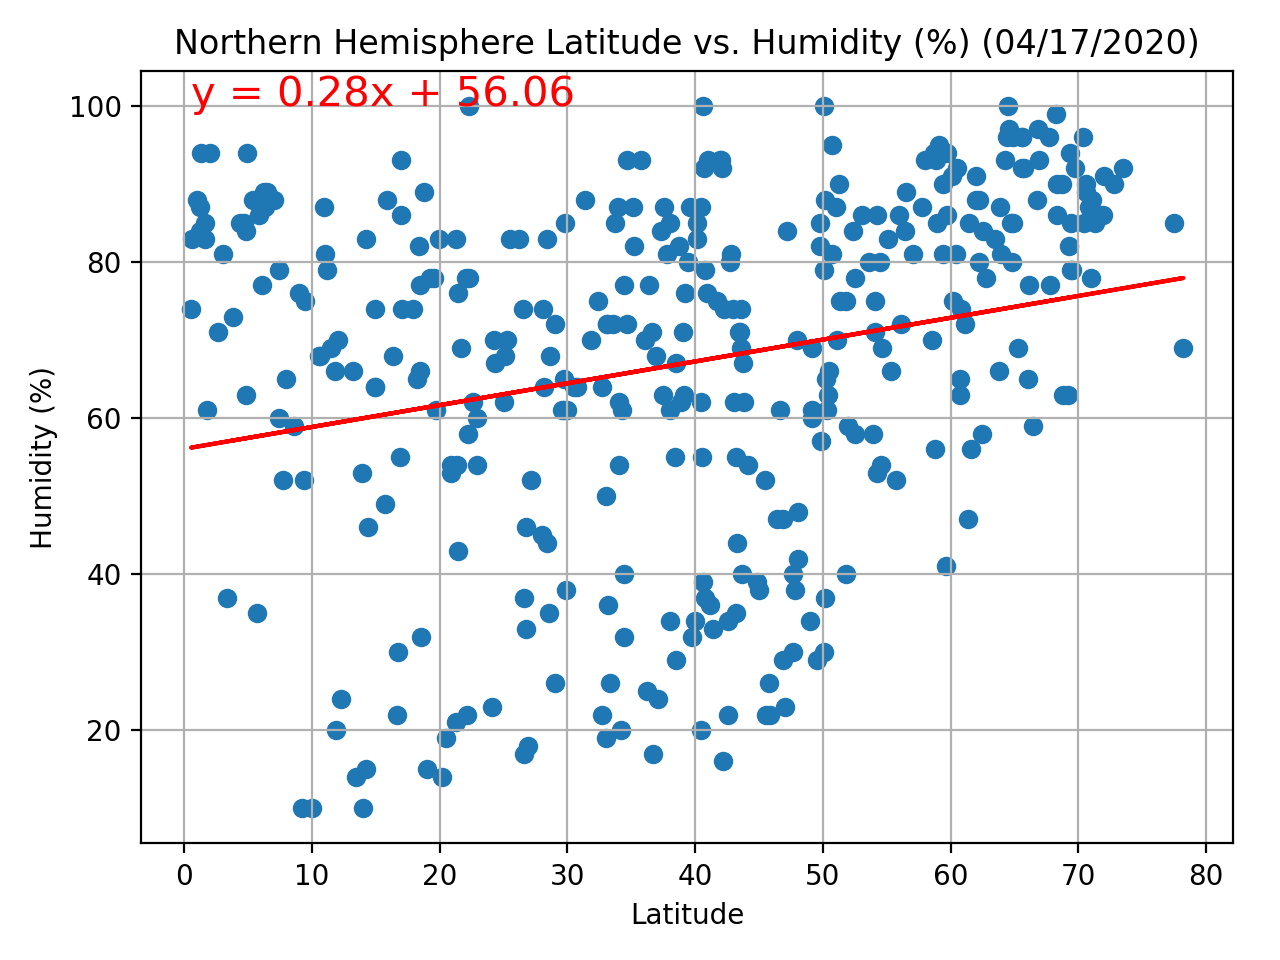

The r-squared is: 0.062274063596176626


<IPython.core.display.Javascript object>


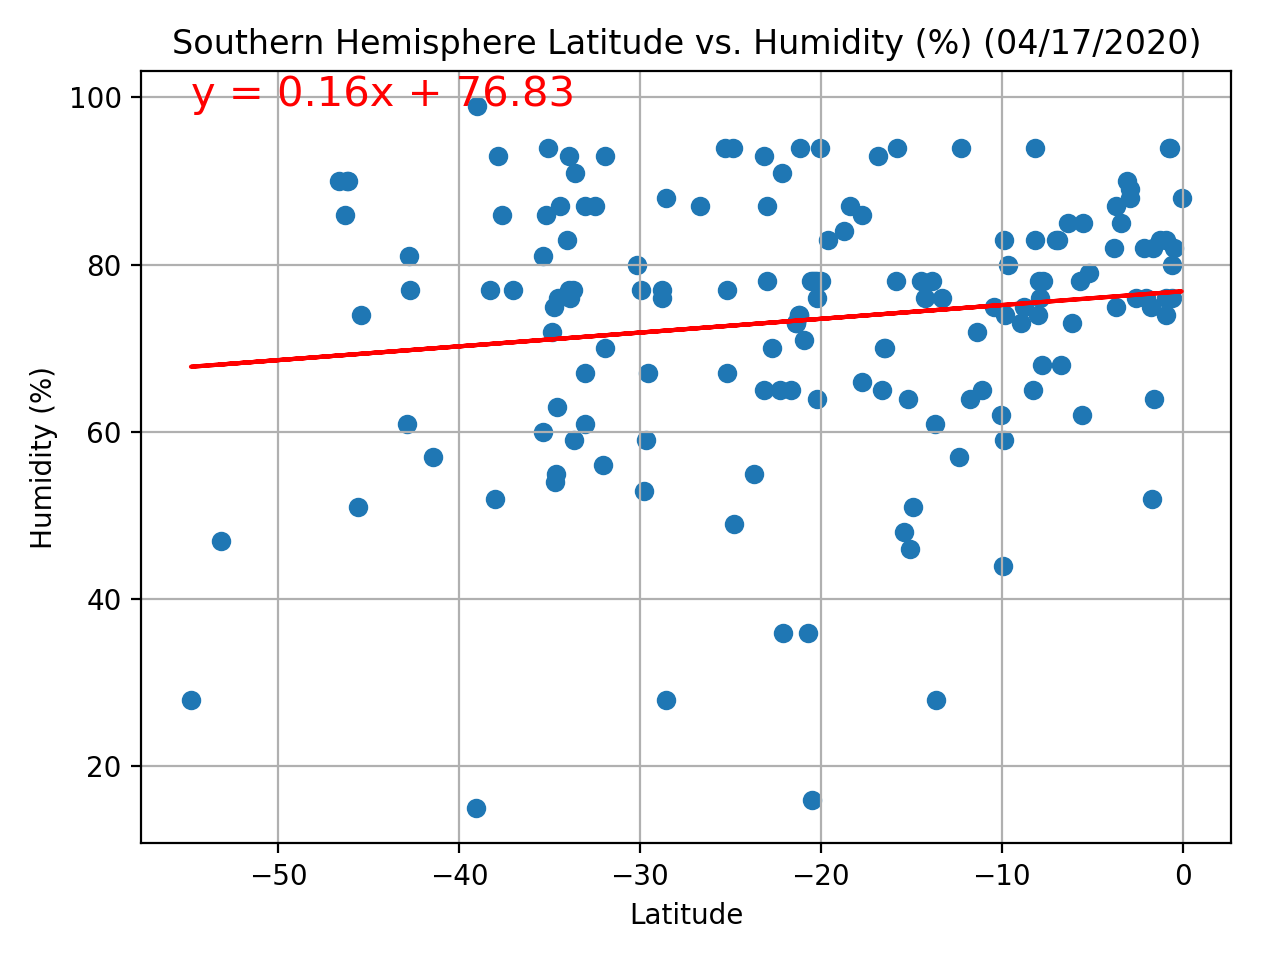

The r-squared is: 0.019860779795455502
These graphs are a set of scatter plots that are analyzing the latitude compared to the humidity percentage, for all cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the farther 
north, away from the equator, you get, the more humid the weather tends to be. The r-squared value is very weak, so this is not reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that as the 
farther north, toward from the equator, you get, the more humid the weather tends to be. The r-squared value is very weak, so 
this is not reliable information. This is data for April 17, 2020.


<IPython.core.display.Javascript object>


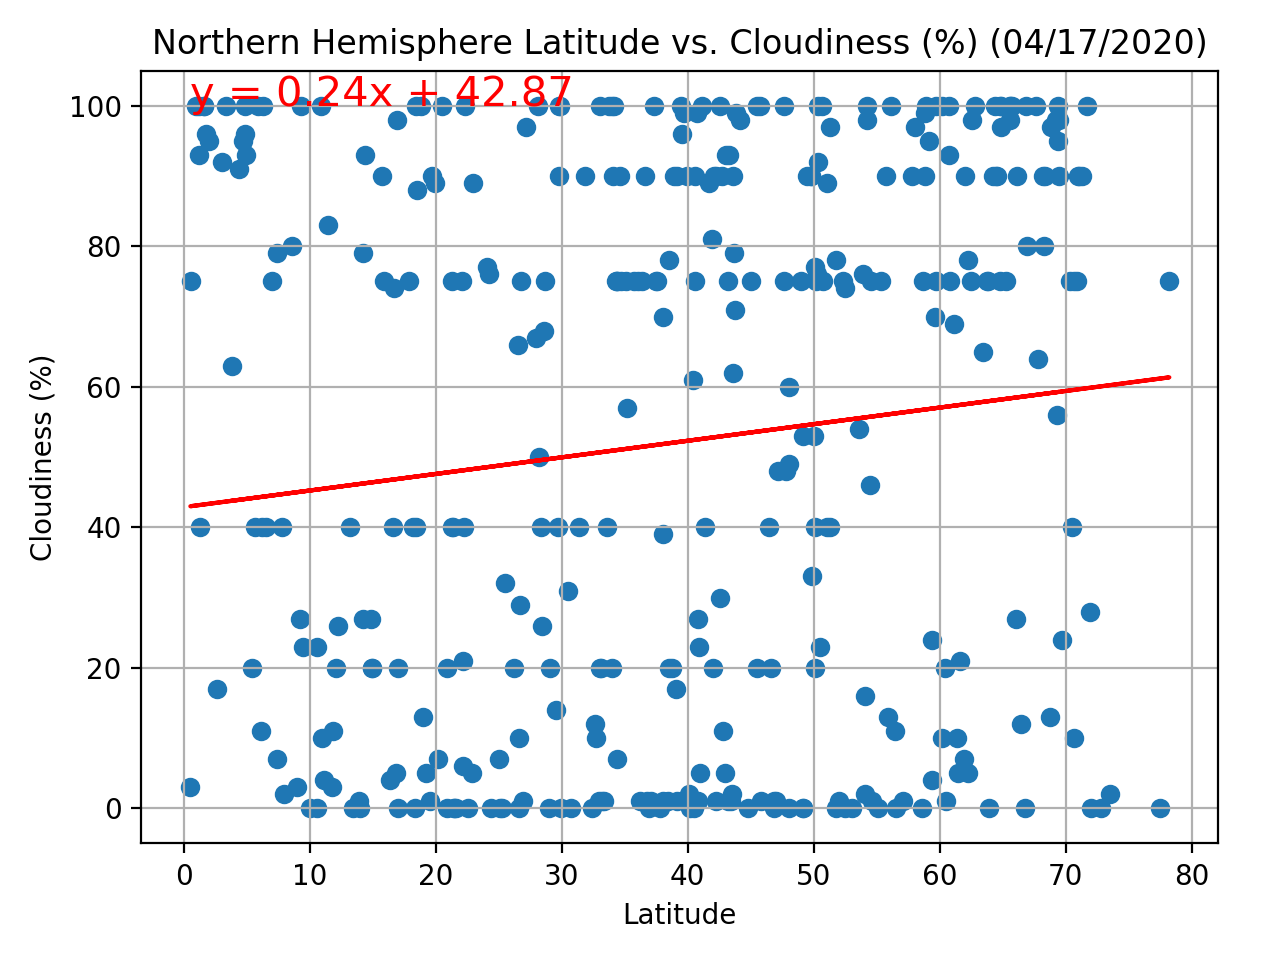

The r-squared is: 0.014800004543443747


<IPython.core.display.Javascript object>


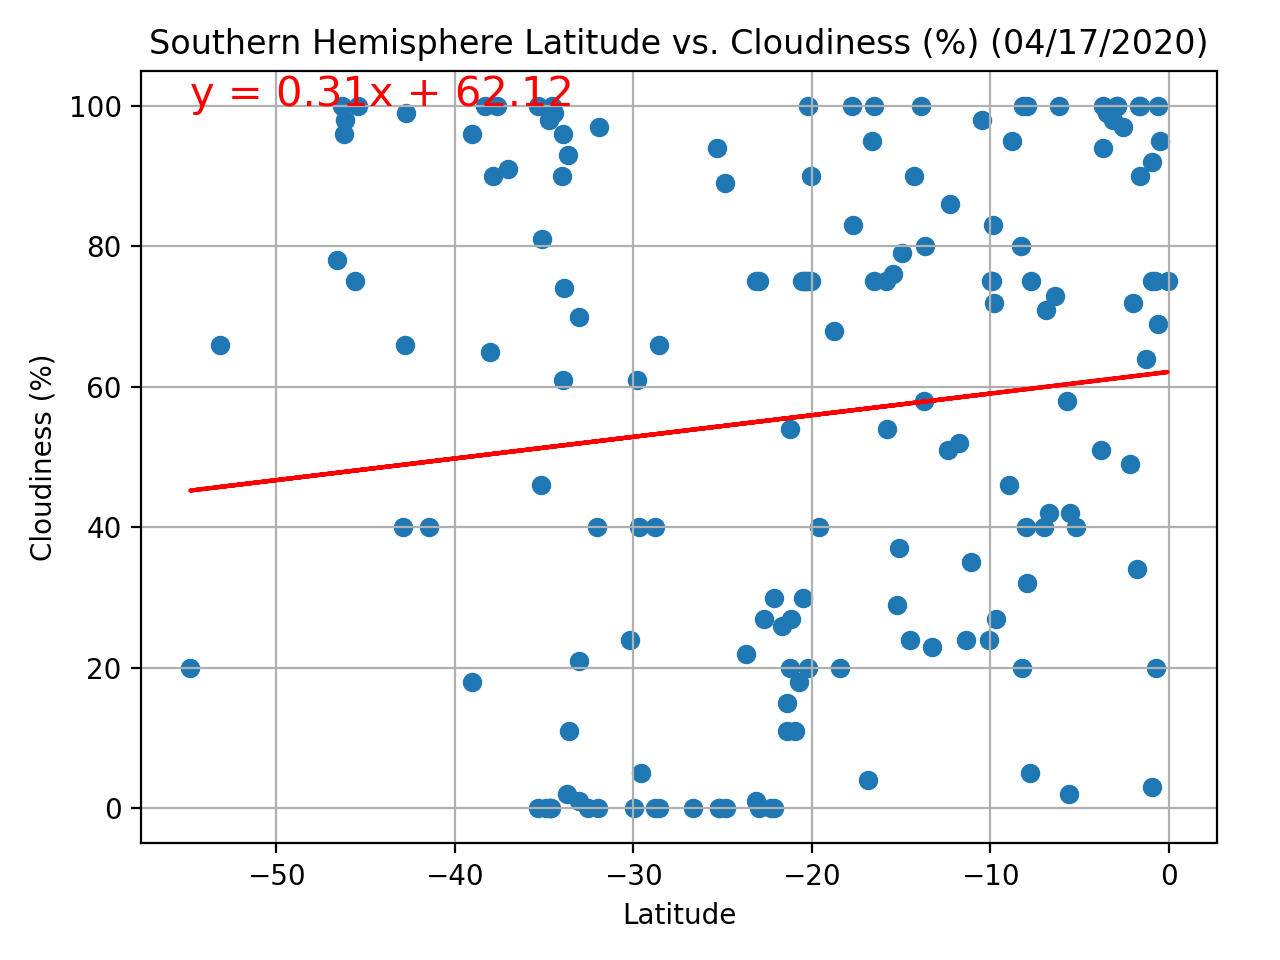

The r-squared is: 0.013706638279053834
These graphs are a set of scatter plots that are analyzing the latitude compared to the cloud coverage percentage, for all 
cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the 
farther north, away from the equator, you get, the more cloud coverage there tends to be. The r-squared value is very weak, so this is not reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see 
that as the farther north, toward from the equator, you get, the more cloud coverage there tends to be. The r-squared value is very weak, so this is not reliable information. This is data for April 17, 2020.


<IPython.core.display.Javascript object>


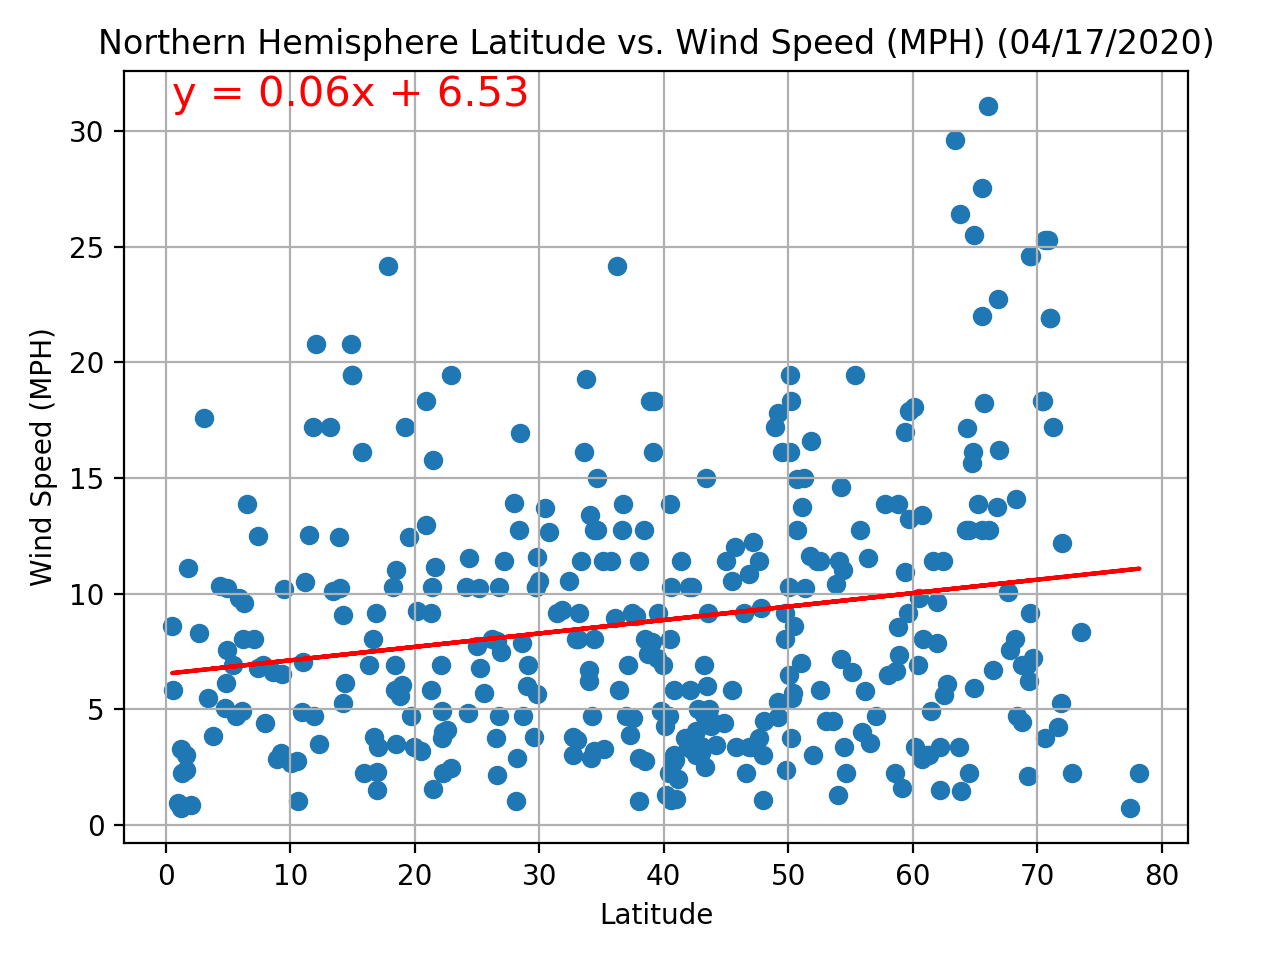

The r-squared is: 0.03924563571120635


<IPython.core.display.Javascript object>


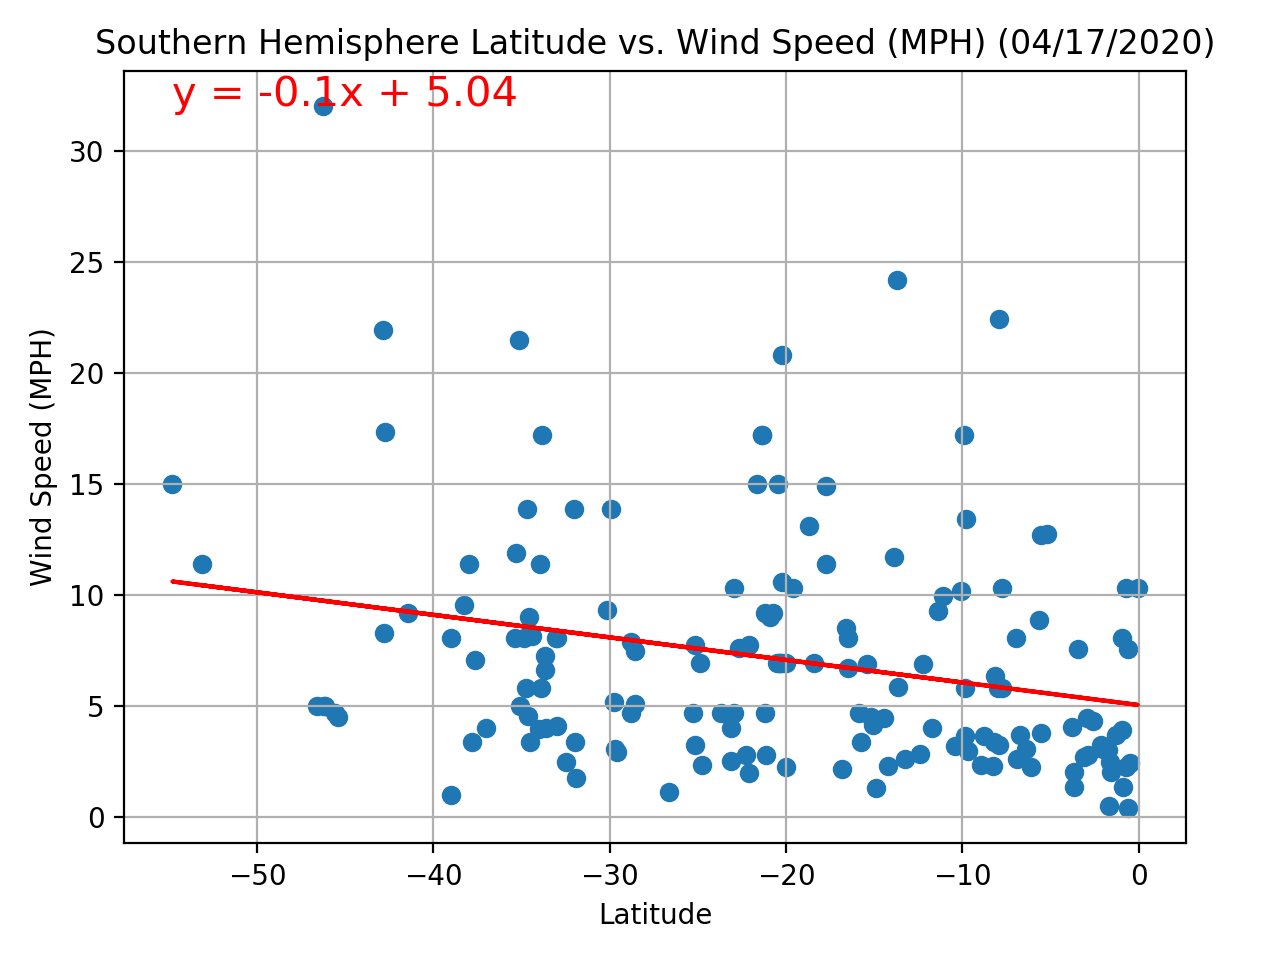

The r-squared is: 0.06949953279178055
These graphs are a set of scatter plots that are analyzing the latitude compared to the wind speed, in miles per hour, for all 
cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the farther north, away from the equator, you get, the less wind there tends to be. The r-squared value is very weak, so this is 
not reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that as 
the farther north, toward from the equator, you get, the windier  the weather tends to be. The r-squared value is very weak, so this is not reliable information. This is data for April 17, 2020.


In [15]:
# Create a loop to make scatter plots
for x in range(8):
    plt.figure()
    plt.scatter(x_reg_plots[x], y_reg_plots[x])

    # Set title, x labels, and y labels for the chart
    plt.title(f"{x_reg_labels[x]} vs. {y_reg_labels[x]} ({date})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_reg_labels[x]}")
    plt.grid()
    
    # Create Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_plots[x], y_reg_plots[x])
    r_squared = rvalue**2
    print(f"The r-squared is: {r_squared}")
    regress_values = x_reg_plots[x] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_reg_plots[x],regress_values,"r-")
    plt.annotate(line_eq,(x_reg_plots[x].min(),y_reg_plots[x].max()),fontsize=15,color="red")
    
    # Display Chart with Tight Layout
    plt.show()
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"../output_data/Fig{x + 5}.png")
    
    # create a print statement for each graph
    if (x_reg_labels[x] == "Southern Hemisphere Latitude" and y_reg_labels[x] == "Temperature (F)"):
        print(f"These graphs are a set of scatter plots that are analyzing the latitude compared to the maximum temperature, in Fahrenheit, for all cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as \nthe farther north, away from the equator, you get, the colder the temperature tends to be. The r-squared value is strong, so \nthis is reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that \nas the farther north, toward from the equator, you get, the warmer the temperature tends to be. The r-squared value is strong, so this is reliable information. This is data for April 17, 2020.")
    elif (x_reg_labels[x] == "Southern Hemisphere Latitude" and y_reg_labels[x] == "Humidity (%)"):
        print(f"These graphs are a set of scatter plots that are analyzing the latitude compared to the humidity percentage, for all cities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the farther \nnorth, away from the equator, you get, the more humid the weather tends to be. The r-squared value is very weak, so this is not reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that as the \nfarther north, toward from the equator, you get, the more humid the weather tends to be. The r-squared value is very weak, so \nthis is not reliable information. This is data for April 17, 2020.")
    elif (x_reg_labels[x] == "Southern Hemisphere Latitude" and y_reg_labels[x] == "Cloudiness (%)"):
        print(f"These graphs are a set of scatter plots that are analyzing the latitude compared to the cloud coverage percentage, for all \ncities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the \nfarther north, away from the equator, you get, the more cloud coverage there tends to be. The r-squared value is very weak, so this is not reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see \nthat as the farther north, toward from the equator, you get, the more cloud coverage there tends to be. The r-squared value is very weak, so this is not reliable information. This is data for April 17, 2020.")
    elif (x_reg_labels[x] == "Southern Hemisphere Latitude" and y_reg_labels[x] == "Wind Speed (MPH)"):
        print(f"These graphs are a set of scatter plots that are analyzing the latitude compared to the wind speed, in miles per hour, for all \ncities in the DataFrame. The first scatter plot looks at this relationship for the Northern Hemisphere. We can see that as the farther north, away from the equator, you get, the less wind there tends to be. The r-squared value is very weak, so this is \nnot reliable information. The second scatter plot looks at this relationship for the Southern Hemisphere. We can see that as \nthe farther north, toward from the equator, you get, the windier  the weather tends to be. The r-squared value is very weak, so this is not reliable information. This is data for April 17, 2020.")
        

In [16]:
# Specify Output Location 
output = "../output_data/observable_trends.txt"

In [17]:
# Write Observable Trends to Text File
with open(output, "w", encoding="utf-8") as txtfile:
    txtfile.write("Observable Trends:\n")
    txtfile.write("1. The strongest r-squared value I found was comparing the Northern Hemisphere’s latitude to the temperatures of cities that correspond. I am most confident saying that as you get farther north from the equator, the average temperature will fall.\n")
    txtfile.write("2. The r-squared value for the Northern Hemisphere’s latitude to the temperatures of cities that correspond is markedly higher than the same comparison for the Southern Hemisphere. I would want to investigate this further to see why the Northern Hemisphere appears to be more consistent. \n")
    txtfile.write("3. The graphs for latitude vs cloudiness, humidity, and wind speed, respectively, have very low r-squared values. The correlation between latitude and these different measures are too low to draw meaningful conclusions.\n")